In [1]:
%load_ext autoreload
%autoreload 2

# Introduction to gradient descent

Useful links:

* https://playground.tensorflow.org
* https://www.geogebra.org/m/jmTFk4eg


### Setup


In [2]:
# If True, test is running on Colab. Otherwise, test if assumed to be offline.
TEST_ON_COLAB = False

FOLDERNAME = "Colab Notebooks/ann/2_intro-gradient-descent" # only used if TEST_ON_COLAB is True

assert not (FOLDERNAME is None and TEST_ON_COLAB), "FOLDERNAME has to be set if TEST_ON_COLAB is True"

Set a seed for reproducibility:

In [3]:
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [4]:
SEED = 42

In [5]:
import numpy as np

np.random.seed(SEED)

### A simple 1-D case

For $f(x) = x^2$, the derivative is $f'(x) = 2x$. The gradient descent update rule is:

$$x_{n+1} = x_n - \alpha f'(x_n)$$

where $\alpha$ is the learning rate.

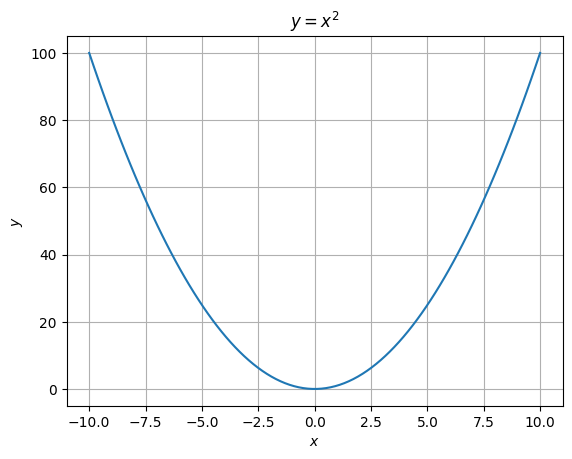

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(-10, 10, 100)
ax.plot(x, x**2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()
plt.title('$y = x^2$')
plt.show()

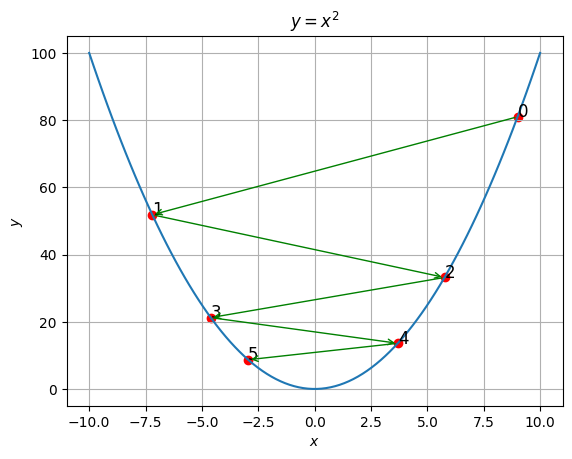

In [7]:
x0 = 9 # initial guess
grad = lambda x: 2 * x
learning_rate = 0.9 # step size (try with different values)
num_iterations = 5

# Gradient descent
x_history = [x0]
x_prev = x0
for i in range(num_iterations):
    x_curr = x_prev - learning_rate * grad(x_prev)
    x_history.append(x_curr)
    x_prev = x_curr

# Plot history
x_history = np.array(x_history)
plt.plot(x, x**2)
plt.scatter(x_history, x_history**2, color='red')
for i in range(len(x_history)):
    plt.text(x_history[i], x_history[i]**2, str(i), fontsize=12)

# arrows
for i in range(1, len(x_history)):
    plt.annotate('', xy=(x_history[i], x_history[i]**2), xytext=(x_history[i-1], x_history[i-1]**2),
                 arrowprops={'arrowstyle': '->', 'color': 'g', 'lw': 1},
                 va='center', ha='center')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.title('$y = x^2$')
plt.show()

### A more complex (2-D) case

For $f(x, y) = x^2 + 2y^2 + 3$, the gradient is $\nabla f = [2x, 4y]$. The gradient descent update rule is:

$$x_{n+1} = x_n - \alpha \frac{\partial f}{\partial x}$$
$$y_{n+1} = y_n - \alpha \frac{\partial f}{\partial y}$$


#### From derivatives to gradient

The gradient is a generalization of the derivative to multiple dimensions. The gradient of a function $f(\mathbf{x}) = f(x_1, x_2, \ldots, x_d)$ is the vector of partial derivatives:

$$\nabla f = \frac{\partial f}{\partial \mathbf{x}} = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_d}\right].$$

Thus, for $f(\mathbf{x}) = f(x_1, x_2) = x_1^2 + 2x_2^2 + 3$, the gradient is $\nabla f = \left[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right] = [2x, 4y]^T$, and the update rule is:

$$
\mathbf{x}_{n+1} = \mathbf{x}_n - \alpha \nabla f(\mathbf{x}_n).
$$


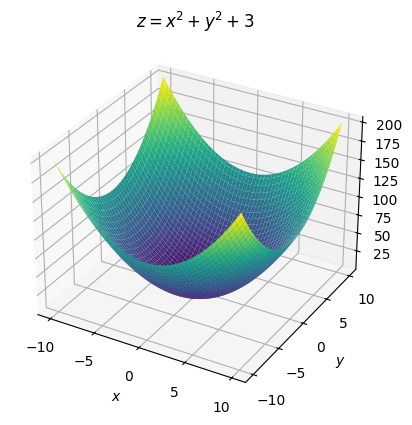

In [8]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.title('$z = x^2 + y^2 + 3$')
plt.show()

In [9]:
x0 = np.array([2, 9]) # initial guess
grad = lambda x: np.array([2 * x[0], 4 * x[1]])
learning_rate = 0.1 # step size (try with different values)

num_iterations = 5

# Gradient descent
x_history = [x0]
x_prev = x0
for i in range(num_iterations):
    x_curr = x_prev - learning_rate * grad(x_prev)
    x_history.append(x_curr)
    x_prev = x_curr
    print(x_curr)

[1.6 5.4]
[1.28 3.24]
[1.024 1.944]
[0.8192 1.1664]
[0.65536 0.69984]


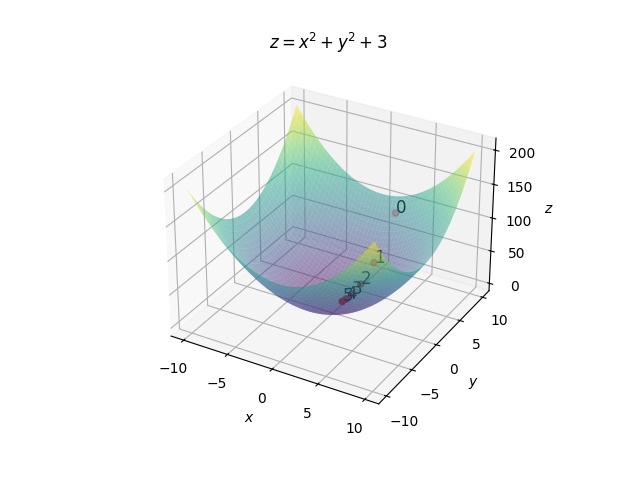

In [10]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot function
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.title('$z = x^2 + y^2 + 3$')

# Plot history
x_history = np.array(x_history)
ax.scatter(x_history[:, 0], x_history[:, 1], x_history[:, 0]**2 + x_history[:, 1]**2 + 3, color='red')
for i in range(len(x_history)):
    ax.text(x_history[i, 0], x_history[i, 1], x_history[i, 0]**2 + x_history[i, 1]**2 + 3, str(i), fontsize=12)

### Revisiting perceptron

For a sample $(\mathbf{x}_i, y_i)$, the perceptron criterion is:

$$L_i = \max(0, -y_i(\mathbf{w} \cdot \mathbf{x}_i)).$$

The gradient of the perceptron criterion is:

$$\nabla_w L_i = \begin{cases}
0 & \text{if } -y_i(\mathbf{w} \cdot \mathbf{x}_i) < 0 \\
-y_i \mathbf{x}_i & \text{otherwise}.
\end{cases}$$

#### Gradient deduction

For correct prediction, $L_i = 0$, therefore $\nabla_w L_i = 0$. For incorrect prediction, $L_i = -y_i(\mathbf{w} \cdot \mathbf{x}_i)$. Thus, 

$$
\begin{align*}
\nabla_w L_i & = \frac{\partial L_i}{\partial \mathbf{w}} \\
             & = \frac{\partial}{\partial \mathbf{w}} (-y_i (\mathbf{w} \cdot \mathbf{x}_i)) \\
            & = -y_i \frac{\partial}{\partial \mathbf{w}} (\mathbf{w} \cdot \mathbf{x}_i) \\
            & = -y_i \mathbf{x}_i.
\end{align*}
$$

The update rule for the perceptron criterion is:

$$
\begin{align*}
\mathbf{w}_{n+1} & = \mathbf{w}_n - \alpha \nabla_w L_i \\
                 & = \begin{cases}
                     \mathbf{w}_n & \text{if } -y_i(\mathbf{w} \cdot \mathbf{x}_i) < 0 \\
                     \mathbf{w}_n + \alpha y_i \mathbf{x}_i & \text{otherwise}.
                     \end{cases}
\end{align*}
$$





In [11]:
%matplotlib widget

x = np.array([1, 1])
w = np.array([1, 1]) # weights (the last element is the bias term)
y = -1 # label
y_pred = int(np.dot(w, x) > 0) # prediction
loss_fn = lambda x, y: max(0, -y * np.dot(w, x)) # perceptron loss function
grad_fn = lambda x, y: -y * x if loss_fn(x, y) > 0 else 0 # perceptron gradient

print(f"y={y}, y_pred={y_pred}, loss={loss_fn(x, y)}, grad={grad_fn(x, y)}")

y=-1, y_pred=1, loss=2, grad=[1 1]


Text(0.5, 0.92, '$\\text{loss} = \\max(0, -y(w_1 x_1 + w_2 x_2))$')

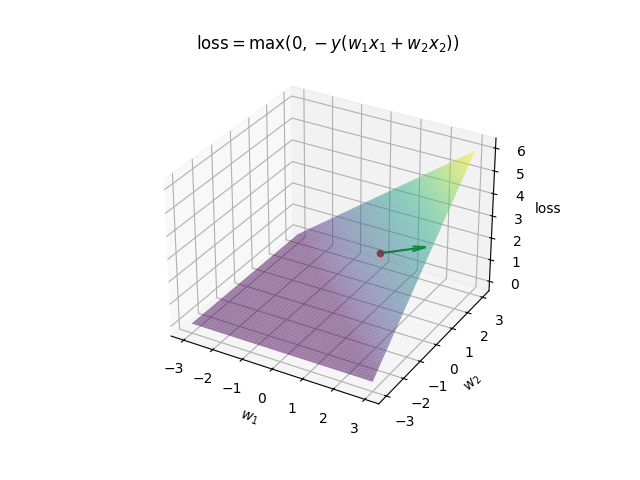

In [12]:
ws = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(ws, ws)
L = np.maximum(0, -y * (W1 * x[0] + W2 * x[1]))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot function
ax.plot_surface(W1, W2, L, cmap="viridis", alpha=0.5)
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('loss')

# plot w1, w2, loss
ax.scatter(w[0], w[1], loss_fn(x, y), color='red')

# plot gradient
grad = grad_fn(x, y)
ax.quiver(w[0], w[1], loss_fn(x, y), grad[0], grad[1], 0, color='green')

plt.title('$\\text{loss} = \max(0, -y(w_1 x_1 + w_2 x_2))$')